## Introducció al treball i dataset utilitzat.

En aquest treball estudiarem i crearem un model predictiu en relació a l'apoplexia (Accident vascular cerebral). D’acord amb l’Organització Mundial de la Salut (OMS) l’apoplexia és la segona causa principal de mort a nivell mundial, comportant aproximadament l’11% de les morts. 


Per a poder realitzar aquest estudi utilitzarem un dataset  de Data Files anomenat Stroke Prediction Dataset. Aquest conjunt de dades sera utilitzar en aquest treball per a predir quan un pacient és propens a patir apoplexia basant-se en paràmetres d’entrada com poden ser el sexe, l’edat, altres enfermetats i el tabaquisme. Cada columna aporta informació rellevant de cada pacient, amb un total de 5.100 registres diferents.


##Importar Llibreries i Càrrega de dades

Importem les llibreries necessàries per a l'estudi.

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle


import numpy as np
  import numpy as np
sns.set_theme()

Importem el dataset que estudiarem en qüestió.

In [ ]:
drive.mount('/content/drive')
dt = pd.read_csv('/content/drive/My Drive/dataset_original.csv')
dt.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploració de dades 

In [ ]:
dt.shape

(5110, 12)

El nostre arxiu conté una taula de 5110 files i 12 columnes.

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


La columna "bmi" presenta 4909 valors no nuls, això indica que els altres 201 valors que falten seran nuls. Més endavant caldrà tractar aquesta columna ja que els valors no nuls donaran problemes, per exemple, amb la normalització.

In [ ]:
dt.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


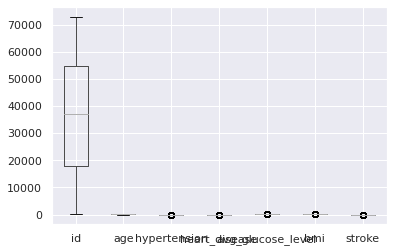

In [ ]:
dt.boxplot()

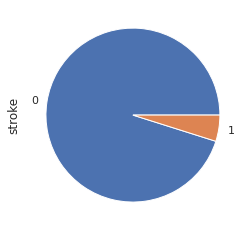

In [ ]:
  dt['stroke'].value_counts().plot(kind='pie')

In [ ]:
#sns.pairplot(dt, hue='stroke')

## Eliminació columnes innecesàries

La columna "id" no serà necessària en el nostre estudi. Per tant, decidim eliminar-la. Abans de fer-ho, comprovem que no hi hagi cap "id" repetit per assegurar-nos que no hi hagi cap duplicat en el nostre dataset.

In [ ]:
a = dt['id'].value_counts()
for i in a:
  if i != 1:  
    print(i)

No hi ha cap "id" repetida. Procedim a eliminar-la.

In [ ]:
dt=dt.drop(['id'], axis=1)
dt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Valors Nuls

En aquest apartat analitzarem com procedim respecte a les files que tenen un valor nul (NaN). En aquest cas tenim principalment tres opcions:

- Borrar les files.
- Substituint per el valor de la columna "mean" o "mode" o "median".
- imputació fent servir un algoritme kNN.
- imputació fent servir un model de deep learning.
- Predicció dels valors nuls.


Com podem veure fent servir la llibreria missingno, només hi ha una columna que presenta valors nuls: "bmi". Haurem de trobar la forma adequada per tractar-la sense haver d'esborrar les fileres que contiguin valors nuls.

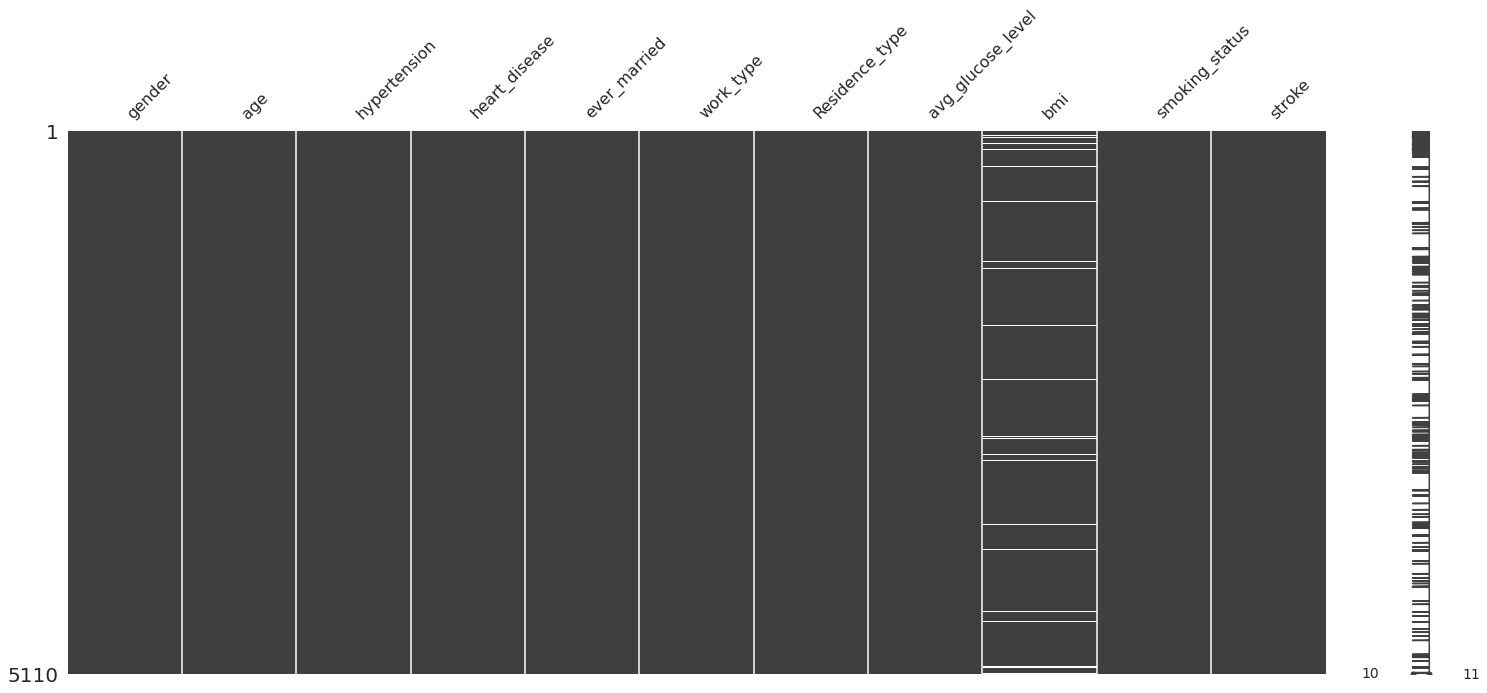

In [ ]:
msno.matrix(dt)

L'opció de esborrar les files, si bé és una opció de la qual resulta un model robust, és perillosa, ja que estem eliminant una quantitat de data que pot ser important. És per això que és interessant estudiar la viabilitat d'altres mètodes i deixar aquest com la última opció.

In [ ]:
dt_nuls_bmi = dt[dt.bmi.isnull()]
dt_nuls_bmi

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
dt['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

El nostre dataset presenta 210 valors nuls en la columna "bmi".

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


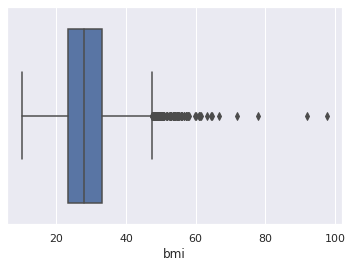

In [ ]:
sns.boxplot(dt.bmi)

Per contar el total de valors atípics, necessitem saber el límit de tolerància (1,5*Q3). Hem trobat que el Q3 (quartil 3) val 33, per tant multipliquem 33 per 1,5 i obtenim un resultat de 49.5. Qualsevol valor per sobre de 49.5 serà considerat un valor atípic.

In [ ]:
dt_auxi=dt[dt['bmi']>49.5]
valors_atipics=dt_auxi['bmi'].count()
valors_no_nuls=dt['bmi'].count()
porcentatge_valors_atipics=(valors_atipics*100)/valors_no_nuls
print(valors_atipics,porcentatge_valors_atipics)

83 1.6907720513342839


Com es pot observar a la gràfica anterior, no seria bona idea substituir els valors nuls per la mitjana ja que concretament hi ha 83 valors atípics que suposen 1,7% del total. Aquest percentatge no és gaire significatiu però distorsionarien el model pel fet de ser asimètrics. En cas de presentar-se valors atípics simètrics (per exemple 40 per l’esquerra i 40 per la dreta), podríem plantejar-nos substituir els valors nuls per la mitjana. En aquest cas tots són superiors i no ens permet fer-ho.



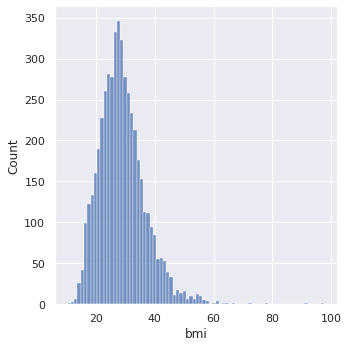

In [ ]:
sns.displot(dt.bmi)

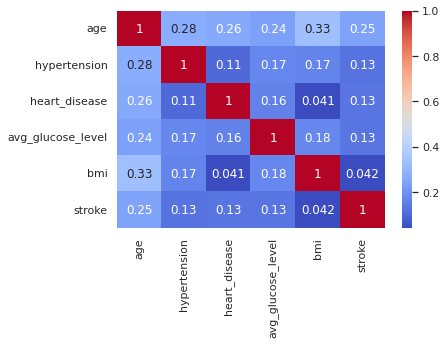

In [ ]:
sns.heatmap(dt.corr(),annot=True,cmap='coolwarm')

Al gràfic de distribució, clarament s'observa la cua per la dreta provocada pels valors atípics comentats anteriorment -asimetria-. 

El fet que els valors de l'atribut "bmi" siguin de tipus numèric -float- amb tipologia de variable contínua, ens permet descartar l'ús de la moda, la qual té més sentit utilitzar-la en casos on la tipologia de variable és categòrica.

L'ús de l'algoritme kNN o regració lineal per predir un "bmi" per cada valor nul no seria gaire correcte ja que l'atribut "bmi" (índex de massa corporal) no té cap correlació clara amb cap de els altres atributs i/o classes (com es pot veure a la figura del heatmap). Podríem plantejar-nos l'ús d'aquest algoritme en cas que disposessim de columnes com per exemple altura i pes; llavors hi hauria una clara correlació directa que ens permetria predir el valor del "bmi".

Finalment ens decantem per reemplaçar els valors NaN per la mediana ja que és la que millor representa la majoria del conjunt, tenint en compte l'asimetria esmentada. Prenent aquesta mesura estalviem l'esborrat complet de cada filera que presenti un "bmi" nul, lo qual suposaria una pèrdua important d'informació.

In [ ]:
print(dt['bmi'].mean())
print(dt['bmi'].median())
print(dt['bmi'].mode())

28.893236911794673
28.1
0    28.7
dtype: float64


Per tant substituim els valors NaN de l'atribut "bmi" pel valor 28.1


In [ ]:
dt=dt.fillna(dt.median())
dt.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Codificació

En primer lloc, codifiquem els valors binominals -binaris- de 'gender', 'ever_married' i 'residence_type'.




In [ ]:
dt['gender'] = dt['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2})
dt['ever_married'] = dt['ever_married'].replace({'Yes': 0, 'No': 1})
dt['Residence_type'] = dt['Residence_type'].replace({'Rural': 0, 'Urban': 1})
dt['stroke'] = dt['stroke'].replace({1 : 'Yes', 0: 'No'})

In [ ]:
dt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,Private,1,228.69,36.6,formerly smoked,Yes
1,1,61.0,0,0,0,Self-employed,0,202.21,28.1,never smoked,Yes
2,0,80.0,0,1,0,Private,0,105.92,32.5,never smoked,Yes
3,1,49.0,0,0,0,Private,1,171.23,34.4,smokes,Yes
4,1,79.0,1,0,0,Self-employed,0,174.12,24.0,never smoked,Yes


Abans de codificar els valors nominals de 'work_type' i 'smoking_status', reorganitzem l'ordre de les columnes per facilitar la comprensió visualment.

In [ ]:
dt = dt.reindex(columns=['gender','age','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','work_type','smoking_status','stroke'])

In [ ]:
dt.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type,smoking_status,stroke
0,0,67.0,0,1,0,1,228.69,36.6,Private,formerly smoked,Yes
1,1,61.0,0,0,0,0,202.21,28.1,Self-employed,never smoked,Yes
2,0,80.0,0,1,0,0,105.92,32.5,Private,never smoked,Yes
3,1,49.0,0,0,0,1,171.23,34.4,Private,smokes,Yes
4,1,79.0,1,0,0,0,174.12,24.0,Self-employed,never smoked,Yes


In [ ]:
dt = pd.get_dummies(dt, columns=['work_type','smoking_status'])

In [ ]:
dt.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,0,1,228.69,36.6,Yes,0,0,1,0,0,0,1,0,0
1,1,61.0,0,0,0,0,202.21,28.1,Yes,0,0,0,1,0,0,0,1,0
2,0,80.0,0,1,0,0,105.92,32.5,Yes,0,0,1,0,0,0,0,1,0
3,1,49.0,0,0,0,1,171.23,34.4,Yes,0,0,1,0,0,0,0,0,1
4,1,79.0,1,0,0,0,174.12,24.0,Yes,0,0,0,1,0,0,0,1,0


Passem la columna de la classe 'stroke' al final

In [ ]:
dt = dt[[x for x in dt.columns if x != 'stroke']+['stroke']]

In [ ]:
dt.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,67.0,0,1,0,1,228.69,36.6,0,0,1,0,0,0,1,0,0,Yes
1,1,61.0,0,0,0,0,202.21,28.1,0,0,0,1,0,0,0,1,0,Yes
2,0,80.0,0,1,0,0,105.92,32.5,0,0,1,0,0,0,0,1,0,Yes
3,1,49.0,0,0,0,1,171.23,34.4,0,0,1,0,0,0,0,0,1,Yes
4,1,79.0,1,0,0,0,174.12,24.0,0,0,0,1,0,0,0,1,0,Yes


## Single validation

En aquest apartat determinarem amb quin mètode i de quina forma dividirem el dataset.

Començarem provant utilitzant un valor per a dividir el dataset en dos. A aquest valor li direm ths i serà el que determinarà el tamany del dataset de train i de test. Aquest mètode té l'avantatja que en comptes de fer guardar dos cops el dataset a manera d'optimitzar la memòria utilitzada, ja que estem treballant amb google colab.

In [ ]:
dt = shuffle(dt)

In [ ]:
ths = dt.shape[0] // 3 * 2

In [ ]:
dt.iloc[:ths].shape

(3406, 18)

Un cop feta la divisió i tenint en compte que estem treballant amb un dataset mèdic i, com és habitual en aquest tipus de datasets, les classes estan molt desbalancejades, és interessant mirar quin percentatge de valors 1 respecte al total te la classe stroke tant en el data test i al data train.

In [ ]:
dt.iloc[ths:]['stroke'].value_counts()

No     1630
Yes      74
Name: stroke, dtype: int64

In [ ]:
dt.iloc[:ths]['stroke'].value_counts()

No     3231
Yes     175
Name: stroke, dtype: int64

Aquests valors varien cada cop que compilem el github, ja que depenen del resultat d'aplicar el mètode shufle(). Per assegurar que el data test no resulti en una quantitat molt baixa o inexistent de valors stroke = 1 podem aplicar un mètode que asseguri la mateixa proporció de stroke en els dos datasets. (test i train).

Un mètode que soluciona aquest problema és, per exemple, el train_test_split de la llibreria sklern.

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(dt.iloc[:,:-1],dt.iloc[:,-1],test_size =0.3, stratify = dt.iloc[:,-1])

Fem la mateixa comprovació per veure si la solució ha sigut efectiva. Podem veure que efectivament, els dos tenen un 4,9% de valors 1.

In [ ]:
100*y_train.value_counts()[1]/y_train.shape[0]

4.86441151803187

In [ ]:
100*y_test.value_counts()[1]/y_test.shape[0]

4.892367906066537

In [ ]:
Train = pd.concat([X_train,y_train], axis=1,)

In [ ]:
Test = pd.concat([X_test,y_test], axis=1,)

In [ ]:
dt=pd.concat([Train,Test])

In [ ]:
ths = Train.shape[0]

## Normalització

En aquest apartat normalitzarem les columnes. L'objectiu d'aquesta normalització és canviar els valors de les columnes perquè tots facin servir una escala comuna. La normalització també és necessària perquè alguns algorismes modelin les dades correctament. La normalització és clau per al correcte funcionament dels algoritmes de machine learning i deep learning, ja que una gran diferència en l'escala dels números podria generar problemes en intentar combinar els valors com a característiques durant el model.

Hi ha diferents formes de normalització, nosaltres en aquest estudi aplicarem la normalització passant les columnes a escala 0 - 1 ja que hi ha diverses columnes (les de variables nominals i la classe) que ja estan en aquest rang.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
nrm = MinMaxScaler()
nrm.fit(dt.iloc[:ths,1:8])

MinMaxScaler()

In [ ]:
dt.iloc[:,1:8] = pd.DataFrame(nrm.transform(dt.iloc[:,1:8]),
                             columns = dt.columns[1:8],
                             index=dt.index)

Només normalitzem les 8 primeres columnes, ja que les variables nominals i la classe ja estan en escala 0-1.

In [ ]:
dt.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
722,0,0.108016,0.0,0.0,1.0,0.0,0.307500,0.096220,0,0,0,0,1,1,0,0,0,No
4643,1,0.401271,0.0,0.0,0.0,0.0,0.008683,0.261168,0,0,1,0,0,0,0,1,0,No
1683,1,0.327957,0.0,0.0,1.0,0.0,0.222289,0.203895,0,0,1,0,0,0,1,0,0,No
15,1,0.608993,1.0,0.0,0.0,0.0,0.518151,0.235968,0,0,0,1,0,0,0,1,0,Yes
3053,1,0.352395,0.0,0.0,0.0,0.0,0.216377,0.246277,0,0,1,0,0,0,0,1,0,No


In [ ]:
dt.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586301,0.526229,0.097456,0.054012,0.343836,0.508023,0.235210,0.212624,0.128571,0.004305,0.572407,0.160274,0.134442,0.302153,0.173190,0.370254,0.154403
std,0.492941,0.276303,0.296607,0.226063,0.475034,0.499985,0.209143,0.088197,0.334758,0.065480,0.494778,0.366896,0.341160,0.459236,0.378448,0.482920,0.361370
min,0.000000,-0.000978,0.000000,0.000000,0.000000,0.000000,-0.000462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.303519,0.000000,0.000000,0.000000,0.000000,0.101723,0.154639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.547898,0.000000,0.000000,0.000000,1.000000,0.169338,0.203895,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.743402,0.000000,0.000000,1.000000,1.000000,0.271892,0.257732,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Podem confirmar que hem aplicat bé la normalització de cada atribut observa'n el mètode describe, que ofereix informació estadística del dataframe. Veiem que els valors màxims i mínims són 1,0 i 0,0 de cada un dels atributs, per tant, la normalització s'ha realitzat amb èxit.

## Representació gràfica

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(dt.iloc[:ths,:-1])

PCA(n_components=2)

In [ ]:
Xp = pd.DataFrame(pca.transform(dt.iloc[:ths,:-1]))
Xp['stroke'] = dt.iloc[:ths,-1].to_list()

In [ ]:
Xp.head()

,0,1,stroke
0,1.561893,-0.039291,No
1,-0.687691,-0.540263,No
2,0.060700,-0.508851,No
3,-0.591774,0.790811,Yes
4,-0.683807,-0.541195,No


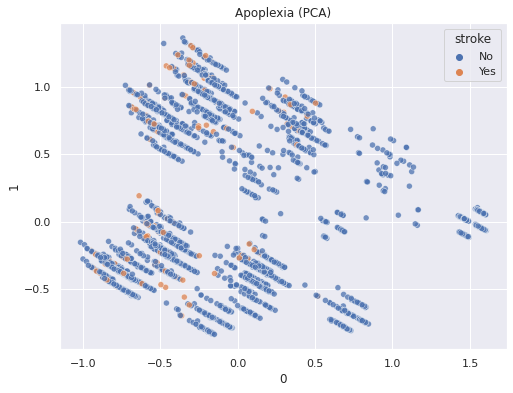

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=Xp,hue='stroke',x=0,y=1,alpha=0.75)
plt.title('Apoplexia (PCA)')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)

In [ ]:
Xp = pd.DataFrame(tsne.fit_transform(dt.iloc[:ths,:-1]))
Xp['stroke'] = dt.iloc[:ths,-1].to_list()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


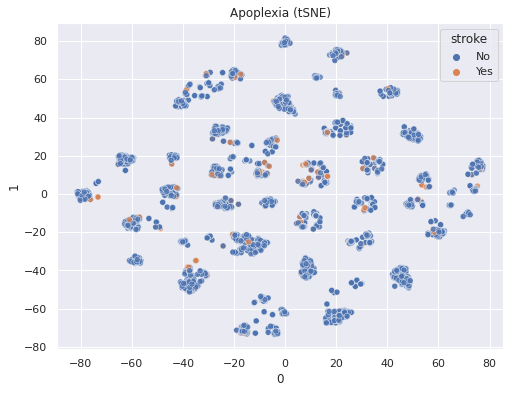

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=Xp,hue='stroke',x=0,y=1,alpha=0.75)
plt.title('Apoplexia (tSNE)')
plt.show()

##Guardar

In [ ]:
dt.iloc[:ths].to_csv('/content/drive/My Drive/TREBALL_IAAE/Jordi_Marc/dataset_apoplexia_training.csv')
dt.iloc[ths:].to_csv('/content/drive/My Drive/TREBALL_IAAE/Jordi_Marc/dataset_apoplexia_testing.csv')